In [1]:
%matplotlib inline

import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

`make_blobs` is going to make blobs of data based on std dev. & some randomness around a specified point. You can specify how many points to generate in the blob, and the stdev.

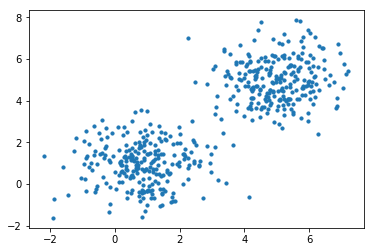

In [50]:
centers = [[1,1],[5,5]]
X, y = make_blobs(n_samples=500, centers=centers, cluster_std=1)
plt.scatter(X[:,0], X[:,1], s = 10)
plt.show()

`make_blobs` returns data points and labels, but you often work with unlabelled data. Therefore `y` here is just a placeholder variable, and you could just call it `_` to make it clear it's just there to occupy space (otherwise `X` would be a tuple since the function returns 2 things).

In [51]:
# ms = ms() # why does this have to be like this, but KMeans not?
# it has to run fn MeanShift.fit(), so needs initialize MeanShift() or ms = MeanShift()
ms = MeanShift()
ms.fit(X) # fit X via Mean Shift
labels = ms.labels_
cluster_centers = ms.cluster_centers_ # the estimated cluster centers

print(cluster_centers)

n_clusters_ = len(np.unique(labels)) # np.unique tells how many unique vars in array

[[ 4.96509428  4.85782207]
 [ 0.86567378  0.98955392]]


In theory, the higher the `n_samples` variable and the lower the standard deviation, the accurate `cluster_centers` will be. Running `np.unique` on `labels` will tell us how many categories or cluster types the machine has returned.

Number of estimated clusters:  2
['r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.']
[1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1
 0 0 1

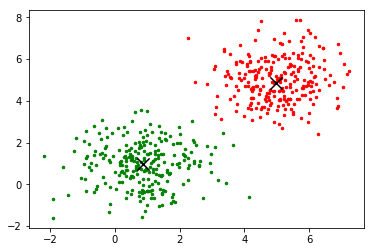

In [52]:
print("Number of estimated clusters: ", n_clusters_)

colors = ['r.','g.','b.','c.','k.','y.','m.']*10 # 7*10 colors to make sure we don't run out

print(colors[:10])
print(labels)

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=5)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
            marker="x", s=150, linewidths=10, zorder=10, c='k')
plt.show()

In [53]:
# X[:10], labels[:10]
# [X[i] for i in range(len(X)) if labels[i] == 1]
T,U = [],[]
for i in range(len(X)):
    if labels[i] == 1:
        T.append([X[i], i])
    else:
        U.append([X[i], i])

T[:10], U[:10]

([[array([ 0.88794206,  1.16089684]), 0],
  [array([ 0.77133559,  1.85927917]), 2],
  [array([ 2.02135258,  1.96984052]), 5],
  [array([-0.42196806,  2.14924844]), 8],
  [array([ 1.53325946,  2.14457833]), 9],
  [array([ 1.02396853, -0.30110737]), 10],
  [array([ 1.80325926,  1.92611236]), 11],
  [array([ 2.09005703,  1.43593527]), 13],
  [array([ 0.26695119,  2.74149156]), 16],
  [array([-0.96324349,  2.091268  ]), 17]],
 [[array([ 5.2917812,  4.6715137]), 1],
  [array([ 4.8992056,  4.8521391]), 3],
  [array([ 4.6330166 ,  6.09511722]), 4],
  [array([ 4.4057182,  5.3597148]), 6],
  [array([ 6.11069857,  4.47725749]), 7],
  [array([ 5.97490857,  4.75394583]), 12],
  [array([ 5.97676201,  4.92156216]), 14],
  [array([ 5.09005921,  4.88521508]), 15],
  [array([ 4.0926588 ,  5.78651343]), 19],
  [array([ 4.10691669,  3.64487202]), 21]])

Now let's see if we add a third blob:

`[3,8]` will be pretty close to `[5,5]` so it may just treat it as one and the same

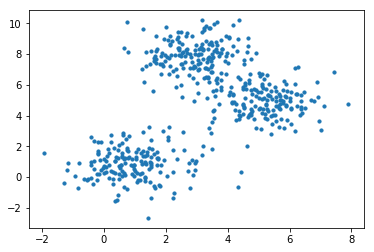

[[ 4.09497594  6.37106857]
 [ 0.8515741   0.86066274]]
Number of estimated clusters:  2
['r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.']
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0
 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0
 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0

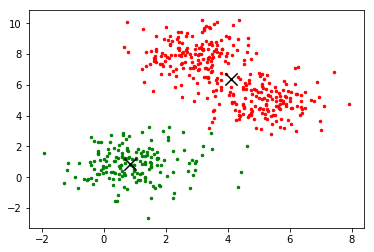

In [54]:
centers = [[1,1],[5,5],[3,8]]
X, y = make_blobs(n_samples=500, centers=centers, cluster_std=1)
plt.scatter(X[:,0], X[:,1], s = 10)
plt.show()

ms = MeanShift()
ms.fit(X) # fit X via Mean Shift
labels = ms.labels_
cluster_centers = ms.cluster_centers_ # the estimated cluster centers

print(cluster_centers)

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: ", n_clusters_)

colors = ['r.','g.','b.','c.','k.','y.','m.']*10 # 7*10 colors to make sure we don't run out

print(colors[:10])
print(labels)

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=5)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
            marker="x", s=150, linewidths=10, zorder=10, c='k')
plt.show()

Which indeed it does.

Now if we make the 3rd blob centered at `[3,10]`, thus more distinct from `[5,5]`:

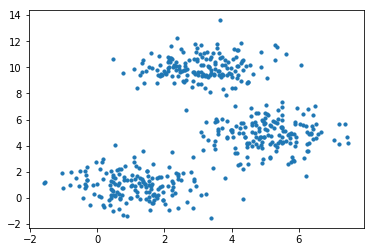

[[ 5.10442377  4.92094069]
 [ 3.04860127  9.9763147 ]
 [ 1.07540263  0.92490569]]
Number of estimated clusters:  3


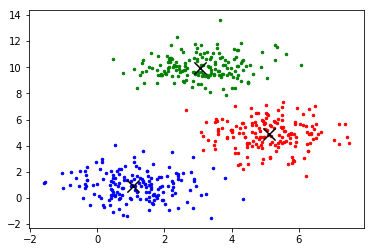

In [57]:
centers = [[1,1],[5,5],[3,10]]
X, y = make_blobs(n_samples=500, centers=centers, cluster_std=1)
plt.scatter(X[:,0], X[:,1], s = 10)
plt.show()

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: ", n_clusters_)

colors = ['r.','g.','b.','c.','k.','y.','m.']*10

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=5)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
            marker="x", s=150, linewidths=10, zorder=10, c='k')
plt.show()

As we expected. The estimated centers [[5.10, 4.92],[3.05,9.97],[1.08, 0.92]] are very close to the actual centers. However, we can easily throw everything off by upping the standard deviation. Here we'll set it to `5` and see what happens:

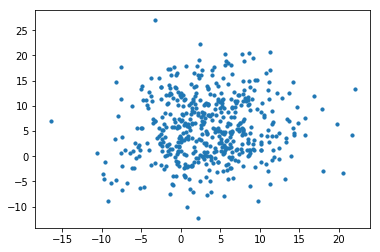

[[  3.31992522   4.14864494]
 [-16.48252527   6.97341553]]
Number of estimated clusters:  2


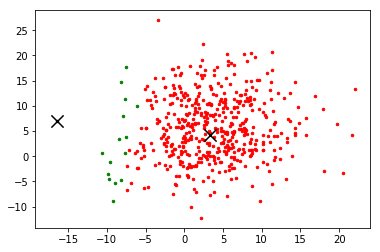

In [62]:
centers = [[1,1],[5,5],[3,10]]
X, y = make_blobs(n_samples=500, centers=centers, cluster_std=5)
plt.scatter(X[:,0], X[:,1], s = 10)
plt.show()

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: ", n_clusters_)

colors = ['r.','g.','b.','c.','k.','y.','m.']*10

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=5)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
            marker="x", s=150, linewidths=10, zorder=10, c='k')
plt.show()

Here it just barely infers a second cluster centered on that single outlier point on the far left, but this is an uncommon result, and upping the standard deviation even further yields single cluster results.

Lowering the standard deviation tightens up of the groupings as we'd expect:

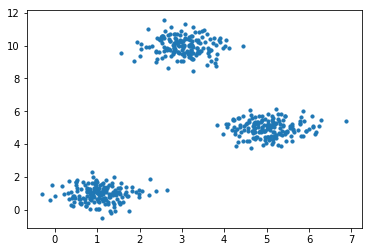

[[ 5.02761078  4.96369976]
 [ 1.04183294  0.96937428]
 [ 3.05756401  9.97986707]]
Number of estimated clusters:  3


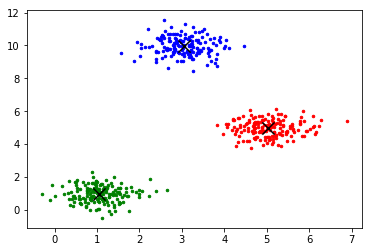

In [63]:
centers = [[1,1],[5,5],[3,10]]
X, y = make_blobs(n_samples=500, centers=centers, cluster_std=0.5)
plt.scatter(X[:,0], X[:,1], s = 10)
plt.show()

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: ", n_clusters_)

colors = ['r.','g.','b.','c.','k.','y.','m.']*10

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=5)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
            marker="x", s=150, linewidths=10, zorder=10, c='k')
plt.show()